In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Final Project/keypoint model training/csv/keypoint_6mar.csv'

# Load data

In [ ]:
column_names = ['hand_sign_id',
    'lm0_x', 'lm0_y', 'lm1_x', 'lm1_y', 'lm2_x', 'lm2_y', 'lm3_x', 'lm3_y',
    'lm4_x', 'lm4_y', 'lm5_x', 'lm5_y', 'lm6_x', 'lm6_y', 'lm7_x', 'lm7_y',
    'lm8_x', 'lm8_y', 'lm9_x', 'lm9_y', 'lm10_x', 'lm10_y', 'lm11_x', 'lm11_y',
    'lm12_x', 'lm12_y', 'lm13_x', 'lm13_y', 'lm14_x', 'lm14_y', 'lm15_x', 'lm15_y',
    'lm16_x', 'lm16_y', 'lm17_x', 'lm17_y', 'lm18_x', 'lm18_y', 'lm19_x', 'lm19_y',
    'lm20_x', 'lm20_y'
]
df = pd.read_csv(dataset, header=None, names=column_names)

In [ ]:
df.head()

,hand_sign_id,lm0_x,lm0_y,lm1_x,lm1_y,lm2_x,lm2_y,lm3_x,lm3_y,lm4_x,...,lm16_x,lm16_y,lm17_x,lm17_y,lm18_x,lm18_y,lm19_x,lm19_y,lm20_x,lm20_y
0,0,0.0,0.0,0.318043,-0.107034,0.611621,0.033639,0.840979,0.238532,1.0,...,0.538226,0.394495,0.256881,0.660550,0.568807,0.623853,0.556575,0.495413,0.464832,0.449541
1,0,0.0,0.0,0.368613,-0.138686,0.642336,-0.010949,0.843066,0.218978,1.0,...,0.576642,0.492701,0.229927,0.784672,0.594891,0.770073,0.594891,0.609489,0.492701,0.547445
2,0,0.0,0.0,0.324675,-0.168831,0.610390,-0.100649,0.860390,0.087662,1.0,...,0.613636,0.402597,0.321429,0.681818,0.655844,0.691558,0.649351,0.535714,0.538961,0.464286
3,0,0.0,0.0,0.308605,-0.160237,0.593472,-0.086053,0.839763,0.089021,1.0,...,0.569733,0.418398,0.296736,0.661721,0.605341,0.661721,0.593472,0.528190,0.498516,0.483680
4,0,0.0,0.0,0.270096,-0.125402,0.556270,-0.025723,0.810289,0.176849,1.0,...,0.543408,0.372990,0.263666,0.665595,0.575563,0.633441,0.565916,0.495177,0.488746,0.440514


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hand_sign_id  1080 non-null   int64  
 1   lm0_x         1080 non-null   float64
 2   lm0_y         1080 non-null   float64
 3   lm1_x         1080 non-null   float64
 4   lm1_y         1080 non-null   float64
 5   lm2_x         1080 non-null   float64
 6   lm2_y         1080 non-null   float64
 7   lm3_x         1080 non-null   float64
 8   lm3_y         1080 non-null   float64
 9   lm4_x         1080 non-null   float64
 10  lm4_y         1080 non-null   float64
 11  lm5_x         1080 non-null   float64
 12  lm5_y         1080 non-null   float64
 13  lm6_x         1080 non-null   float64
 14  lm6_y         1080 non-null   float64
 15  lm7_x         1080 non-null   float64
 16  lm7_y         1080 non-null   float64
 17  lm8_x         1080 non-null   float64
 18  lm8_y         1080 non-null 

In [ ]:
df.describe()

,hand_sign_id,lm0_x,lm0_y,lm1_x,lm1_y,lm2_x,lm2_y,lm3_x,lm3_y,lm4_x,...,lm16_x,lm16_y,lm17_x,lm17_y,lm18_x,lm18_y,lm19_x,lm19_y,lm20_x,lm20_y
count,1080.000000,1080.0,1080.0,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.523148,0.0,0.0,-0.048710,-0.073168,-0.087164,-0.002138,-0.112876,0.108274,-0.135858,...,-0.024163,0.279807,-0.044782,0.510249,-0.058464,0.580188,-0.058837,0.542348,-0.063396,0.512904
std,0.499695,0.0,0.0,0.249870,0.162354,0.444334,0.342755,0.599320,0.504312,0.705939,...,0.573295,0.426648,0.360330,0.255376,0.537167,0.332137,0.606506,0.350443,0.634924,0.371104
min,0.000000,0.0,0.0,-0.484043,-0.449123,-0.795858,-0.743860,-0.964497,-0.912281,-1.000000,...,-1.000000,-0.822857,-0.761194,-0.067073,-0.872222,-0.304878,-0.929577,-0.497143,-1.000000,-0.680000
25%,0.000000,0.0,0.0,-0.280039,-0.228463,-0.485527,-0.414634,-0.635514,-0.526316,-0.744916,...,-0.545445,-0.179482,-0.344336,0.230346,-0.531605,0.248074,-0.544568,0.216127,-0.526661,0.209135
50%,1.000000,0.0,0.0,-0.085951,-0.036364,-0.245335,0.122035,-0.407702,0.329078,-0.518175,...,-0.280161,0.458880,-0.005076,0.584635,-0.102231,0.763997,-0.088424,0.668532,-0.086041,0.566675
75%,1.000000,0.0,0.0,0.228426,0.051601,0.383110,0.269616,0.508366,0.497881,0.590955,...,0.565495,0.604215,0.204685,0.712208,0.441081,0.831339,0.518123,0.871458,0.455148,0.801317
max,1.000000,0.0,0.0,0.402062,0.367089,0.698630,0.670886,0.945205,0.878307,1.000000,...,1.000000,0.932642,0.796053,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
target = np.array(df.hand_sign_id)
x = df.drop(columns=['hand_sign_id'])

#### Preprocess data

##### 01 - If you do not search the best k, then do not split the data

In [ ]:
data1=x.copy()

In [ ]:
# Skewed distribution (X) -->log(X) or sqrt(X) or power transform--> Normal distribution
# Feature scaling: scale of features to be in the same range (Minmaxscaler <Normalization> or Standardscaler <Standardlization>)
# A row of input [x1,x2,---,xn] to be a norm --> normalizer
normalizer=MinMaxScaler().fit(data1)
data1=pd.DataFrame(normalizer.transform(data1), columns=column_names[1:])

In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
lm0_x,1080.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
lm0_y,1080.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
lm1_x,1080.0,0.491288,0.281987,0.0,0.230225,0.449260,0.804046,1.0
lm1_y,1080.0,0.460610,0.198912,0.0,0.270347,0.505701,0.613474,1.0
lm2_x,1080.0,0.474205,0.297315,0.0,0.207650,0.368369,0.788878,1.0
lm2_y,1080.0,0.524279,0.242273,0.0,0.232710,0.612050,0.716366,1.0
lm3_x,1080.0,0.445944,0.313829,0.0,0.172269,0.291561,0.771252,1.0
lm3_y,1080.0,0.569955,0.281646,0.0,0.215552,0.693269,0.787541,1.0
lm4_x,1080.0,0.432071,0.352969,0.0,0.127542,0.240913,0.795478,1.0
lm4_y,1080.0,0.600685,0.306059,0.0,0.229565,0.734038,0.832259,1.0


##### 02 - If you search the best k, then split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3,shuffle=True,stratify=target,random_state=100)

In [ ]:
X_train.shape

(756, 42)

In [ ]:
X_test.shape

(324, 42)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([360, 396]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([18, 21, 15]))

In [ ]:
y_test[:5]

array([0, 1, 0, 1, 0])

In [ ]:
normalizer1=MinMaxScaler().fit(X_train)
X_train=normalizer1.transform(X_train)
X_train

array([[0.        , 0.        , 0.41375897, ..., 0.39721682, 0.        ,
        0.44668328],
       [0.        , 0.        , 0.16255709, ..., 0.77772727, 0.36      ,
        0.72728846],
       [0.        , 0.        , 0.45870029, ..., 0.35216077, 0.        ,
        0.38929045],
       ...,
       [0.        , 0.        , 0.21957781, ..., 0.93036569, 0.61019737,
        1.        ],
       [0.        , 0.        , 0.1268035 , ..., 0.84388768, 0.46017699,
        0.7947243 ],
       [0.        , 0.        , 0.91041897, ..., 0.73398061, 0.73162939,
        0.72159007]])

In [ ]:
X_train=pd.DataFrame(X_train,columns=column_names[1:])
X_train.head()

,lm0_x,lm0_y,lm1_x,lm1_y,lm2_x,lm2_y,lm3_x,lm3_y,lm4_x,lm4_y,...,lm16_x,lm16_y,lm17_x,lm17_y,lm18_x,lm18_y,lm19_x,lm19_y,lm20_x,lm20_y
0,0.0,0.0,0.413759,0.188157,0.332062,0.193833,0.257010,0.174853,0.178138,0.168981,...,0.172065,0.246027,0.127431,0.184268,0.057173,0.363956,0.013843,0.397217,0.000000,0.446683
1,0.0,0.0,0.162557,0.623763,0.181238,0.804992,0.196102,0.925551,0.202500,1.000000,...,0.317500,0.768156,0.546602,0.784457,0.340356,0.881215,0.324829,0.777727,0.360000,0.727288
2,0.0,0.0,0.458700,0.217555,0.368132,0.211977,0.270315,0.191733,0.196121,0.157382,...,0.187500,0.265154,0.117905,0.208276,0.039957,0.339349,0.001571,0.352161,0.000000,0.389290
3,0.0,0.0,0.170081,0.540169,0.180068,0.653778,0.162421,0.725523,0.113169,0.784062,...,0.277778,0.681759,0.470309,0.664480,0.316408,0.788700,0.292556,0.706714,0.320988,0.659449
4,0.0,0.0,0.157847,0.497129,0.110019,0.638808,0.070811,0.727429,0.000000,0.757418,...,0.273713,0.686138,0.365249,0.664762,0.229934,0.700935,0.254033,0.646230,0.308943,0.650010


In [ ]:
X_test=normalizer1.transform(X_test)
X_test=pd.DataFrame(X_test,columns=column_names[1:])

#### Model

##### 01 - If you do not search the best k, then use knn to fit and predict the whole dataset

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(data1,target)

#Predict the response for test dataset
target_pred = knn.predict(data1)

Classification Report: 
               precision    recall  f1-score   support

       hand0       0.98      1.00      0.99       515
       hand1       1.00      0.98      0.99       565

    accuracy                           0.99      1080
   macro avg       0.99      0.99      0.99      1080
weighted avg       0.99      0.99      0.99      1080
 

Accuracy:  0.9898148148148148 



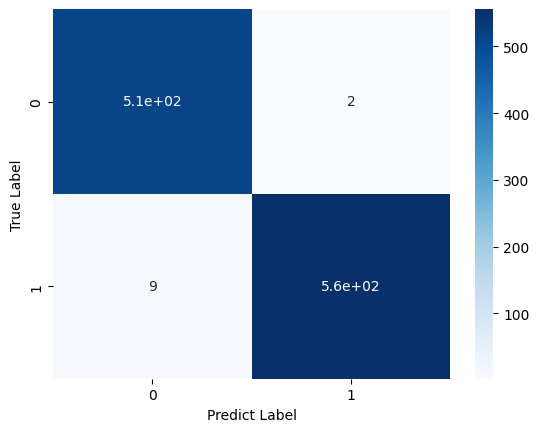

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(target,target_pred,target_names=['hand0','hand1']),'\n')
print("Accuracy: ",metrics.accuracy_score(target,target_pred),'\n')
cf=metrics.confusion_matrix(target,target_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

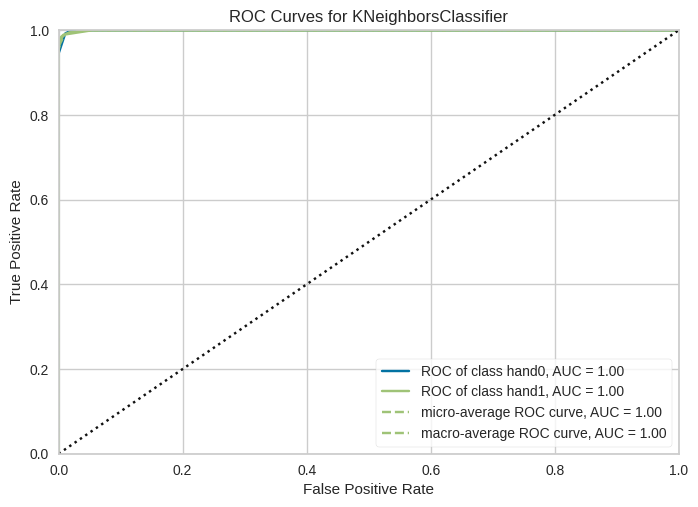

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn, classes=['hand0','hand1'])
visualizer.fit(data1, target)        # Fit the training data to the visualizer
visualizer.score(data1,target)        # Evaluate the model on the test data
visualizer.show()

##### 02 - If you search the best k, then use knn to fit the train set and test set. Later, you can try knn with different number of k, then based on the evaluation metrics to select the best k.

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

Classification Report: 
               precision    recall  f1-score   support

       hand0       0.98      0.99      0.99       155
       hand1       0.99      0.98      0.99       169

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324
 

Accuracy on train:   0.9894179894179894 

Accuracy on test:  0.9876543209876543 



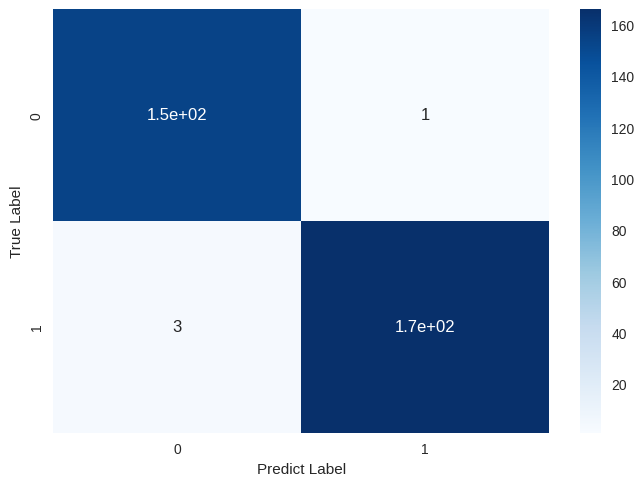

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=['hand0','hand1']),'\n')
print("Accuracy on train:  ",knn.score(X_train,y_train),'\n')
print("Accuracy on test: ",knn.score(X_test,y_test),'\n')
cf=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [ ]:
#let find ROC and AUC score
#before we calculate roc_auc_score(), we need to find out the predicted probabilities for test data.
pred_prob = pd.DataFrame(knn.predict_proba(X_test))
#we'll also add the actual label
test_result=pd.DataFrame(y_test)
test_result.columns=['actual']
test_result = test_result.reset_index()
test_result['prob_0'] = pred_prob.iloc[:,0]
test_result['prob_1'] = pred_prob.iloc[:,1]
test_result['prob_2'] = pred_prob.iloc[:,2]
test_result.head()

IndexError: single positional indexer is out-of-bounds

In [ ]:
y_train.reshape(-1,1)

array([[0],
       [0],
       [0],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train.reshape(-1,1))
y_test1=pd.DataFrame(enc.transform(y_test.reshape(-1,1)).toarray())
y_test1.head()

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [ ]:
#accuracy for each class
metrics.roc_auc_score(y_test1,test_result[['prob_0','prob_1','prob_2']],average=None)

array([0.9845679 , 0.97113997, 1.        ])

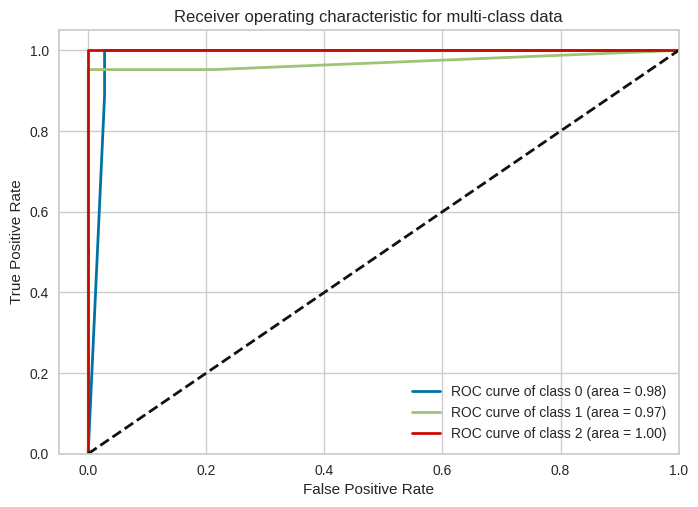

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
k=y_test1.shape[1]
for i in range(k):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test1[[i]], pred_prob[[i]])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

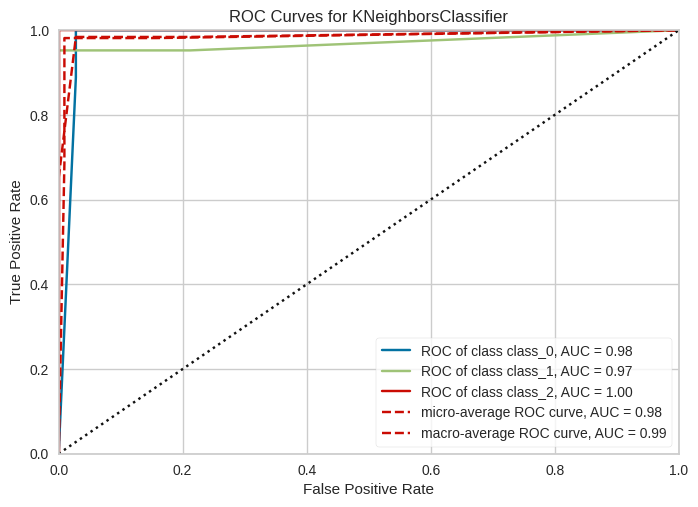

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Fast way to draw ROC curve and calculate AUC accuarcies of each class
#from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

##### 03 - If you search the best k, you can do directly search the best k based on trainset by using cv (cross validation)

In [ ]:
#hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
#we'll create a dictionary with possible hyperparameter values
param_val = [{'n_neighbors' : range(3,10),'metric' : ['euclidean', 'minkowski', 'canberra']}]
#grid search configuration
clfr = GridSearchCV(KNeighborsClassifier(), param_val, cv = 5,scoring='roc_auc_ovr')
#fitting into our data
clfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'minkowski', 'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc_ovr')

In [ ]:
#we'll see for best score and parameters
print(clfr.best_score_)
print(clfr.best_params_)

0.9967651195499296
{'metric': 'euclidean', 'n_neighbors': 9}


In [ ]:
y_pred_new = clfr.predict(X_test)

In [ ]:
pred_prob_new=pd.DataFrame(clfr.predict_proba(X_test))
metrics.accuracy_score(y_test,y_pred_new)

0.9876543209876543

Classification Report: 
               precision    recall  f1-score   support

       hand0       0.98      0.99      0.99       155
       hand1       0.99      0.98      0.99       169

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324
 

Accuracy on train:   0.9894179894179894 

Accuracy on test:  0.9876543209876543 



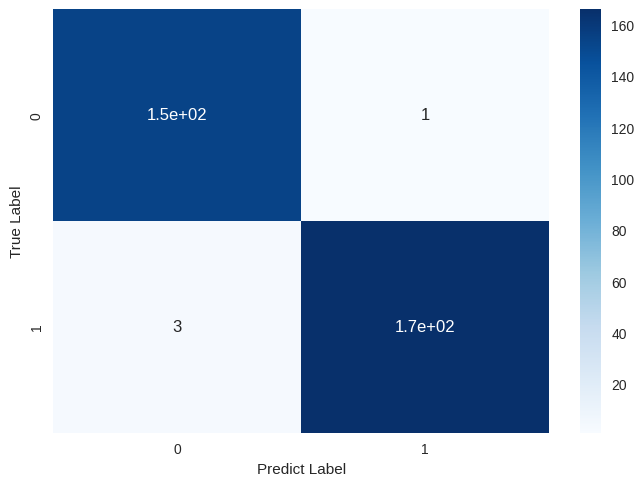

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_new,target_names=['hand0','hand1']),'\n')
print("Accuracy on train:  ",knn.score(X_train,y_train),'\n')
print("Accuracy on test: ",knn.score(X_test,y_test),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_new)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [ ]:
#set knn with the best parameters, you will get the same result as the clfr.
#clfr will use the best parameters it found to predict the new dataset.
knn1 = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn1.fit(X_train,y_train)
y_pred_new1=knn1.predict(X_test)
pred_prob_new1=pd.DataFrame(knn1.predict_proba(X_test))
metrics.accuracy_score(y_test,y_pred_new1)

0.9876543209876543

In [ ]:
clfr.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': [{'n_neighbors': range(3, 10),
   'metric': ['euclidean', 'minkowski', 'canberra']}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'roc_auc_ovr',
 'verbose': 0}

# Pipeline

In [ ]:
# Create the pipeline
from sklearn.pipeline import Pipeline
import joblib


knn_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the data using MinMaxScaler
    ('knn', KNeighborsClassifier(n_neighbors=9, metric='euclidean'))  # KNN with optimal parameters
])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train)

# Export the pipeline to a file
model_path = '/content/drive/MyDrive/Final Project/keypoint model training/other model/keypoint_classifier_knn_24mar_pipeline3.pkl'
joblib.dump(knn_pipeline, model_path)


['/content/drive/MyDrive/Final Project/keypoint model training/other model/keypoint_classifier_knn_24mar_pipeline3.pkl']

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.metrics import pairwise_distances

# Load the saved pipeline
import joblib

model_path = '/content/drive/MyDrive/Final Project/keypoint model training/other model/keypoint_classifier_knn_24mar_pipeline.pkl'
pipeline = joblib.load(model_path)

# Extract the KNN model from the pipeline
# Assuming it's the last step in the pipeline
knn_model = pipeline.named_steps['knn']  # Use your actual step name here

# Get feature names (if available in the pipeline)
try:
    feature_names = pipeline.named_steps['scaler'].get_feature_names_out()
except:
    # If your pipeline doesn't have a column transformer or different structure
    feature_names = [f'feature_{i}' for i in range(knn_model.n_features_in_)]

# Print basic model information
print(f"Number of neighbors (k): {knn_model.n_neighbors}")
print(f"Distance metric: {knn_model.metric}")
print(f"Weight function: {knn_model.weights}")

# 1. Visualize the training data and decision boundaries (for 2D data)
# This only works well if you have 2 features or if you can select 2 important ones
if len(feature_names) >= 2:
    # Get the preprocessed training data
    # You may need to adjust this based on your pipeline structure
    X_train = None
    y_train = None

    try:
        # Try to get the training data from the KNN model
        X_train = knn_model._fit_X
        y_train = knn_model._y
    except:
        print("Couldn't extract training data directly from model")

    if X_train is not None and X_train.shape[1] >= 2:
        # For visualization, use only the first two features
        plt.figure(figsize=(10, 8))

        # Create a mesh grid
        h = 0.02  # Step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Get predictions for each point in the mesh
        Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        plt.contourf(xx, yy, Z, alpha=0.8)

        # Plot the training points
        scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                             edgecolor='k', s=50)
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])
        plt.title('KNN Decision Boundaries')
        plt.legend(*scatter.legend_elements(), title="Classes")
        plt.show()

# 2. Feature importance via permutation importance
# This requires some test data
# Let's create a dummy dataset for demonstration
# In practice, you should use your actual test data
X_test = np.random.random((100, len(feature_names)))
y_test = np.random.randint(0, 2, 100)  # Dummy labels

# Calculate permutation importance
result = permutation_importance(pipeline, X_test, y_test,
                               n_repeats=10, random_state=42)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std': result.importances_std
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('KNN Feature Importance via Permutation')
plt.tight_layout()
plt.show()

# 3. Visualize distance to nearest neighbors (for a sample point)
if X_train is not None:
    # Let's take a sample point (you can choose any point of interest)
    sample_point = X_train[0].reshape(1, -1)

    # Calculate distances to all training points
    distances = pairwise_distances(sample_point, X_train, metric=knn_model.metric).flatten()

    # Get indices of k nearest neighbors
    nearest_indices = np.argsort(distances)[:knn_model.n_neighbors]

    # Create a DataFrame for visualization
    nearest_df = pd.DataFrame({
        'Index': nearest_indices,
        'Distance': distances[nearest_indices],
        'Class': y_train[nearest_indices]
    })

    print("\nNearest neighbors for sample point:")
    print(nearest_df)

    # Visualize distances
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(nearest_indices)), distances[nearest_indices])

    # Color bars by class
    for i, bar in enumerate(bars):
        bar.set_color(plt.cm.tab10(y_train[nearest_indices[i]]))

    plt.xlabel('Neighbor Rank')
    plt.ylabel(f'Distance ({knn_model.metric})')
    plt.title('Distance to K Nearest Neighbors')
    plt.xticks(range(len(nearest_indices)), nearest_indices)
    plt.tight_layout()
    plt.show()

Number of neighbors (k): 9
Distance metric: euclidean
Weight function: uniform


ValueError: X has 2 features, but KNeighborsClassifier is expecting 42 features as input.

<Figure size 1000x800 with 0 Axes>